# Machine Learning: Comparing Classification Algorithms with Iris dataset 
# 1. Abstract
This project sought to identify the most effective machine learning model for the Iris flower dataset through a comparative analysis of two algorithms: k-Nearest Neighbours (kNN) and Decision Trees. Optimal parameters for each model were determined through tuning, and their performance was evaluated using key classification metrics. The results revealed that both kNN and Decision Trees reflected similar accuracy scores, highlighting the significance of further analysis and testing data to evaluate this aim further.
# 2. Introduction
## 2.1 Exploratory Data Analysis - Iris Dataset: 
- The data set contains 3 classes with 50 instances each, and 150 instances in total, where each class refers to a type of iris plant (target).
    - Class : setosa, versicolour, virginica (represented by target values 0-2)
    - Features: sepal length, sepal width, petal length, petal width (cm)
We will be training our models based on these parameters and further use them to predict the flower classes.

### Strategy and Evaluation Metrics based on data sample
- Evaluation Metric: Accuracy
    - Balance: as seen in 2.2.1 (Summary Statistics), the dataset has an equal number of instances for each class (50 per class)
        - Accuracy is calculated as the ratio of correctly predicted instances to the total number of instances.
        - In a balanced dataset, accuracy can be a reliable metric for assessing the overall correctness of predictions as it does not need to account for imbalances between classes or any trade offs in predicting a certain outcome such as false positives/negatives
- Cross-validation strategy: k-fold cross-validation
    - Small dataset (<1000): seeing that dataset has a size of 150 instances, it is relatively small.
        - k-fold cross-validation involves dividing the dataset into 'k' folds, training the model on 'k-1' folds, and validating on the remaining fold. This process is repeated 'k' times, and the performance metrics are averaged.
        - For a small dataset this would be a reasonable strategy to assess the performance of the machine learning models as opposed to nested cross-validation, as splitting data into training and validation sets reduces the amount of data available for training, which may lead to overfitting or result in less robust models.

In [25]:
import numpy as np
import pandas as pd
from sklearn import datasets

### 2.1.1 Data types, shape

In [26]:
# import iris dataset from sklearn 
iris = datasets.load_iris() 

print("Features: ", iris['feature_names'])
print("Class names: ", iris['target_names'], "\n")

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class names:  ['setosa' 'versicolor' 'virginica'] 



### 2.1.2 Iris Dataframe

In [27]:
# Create pandas dataframe by concatenating data and target arrays (using np.c_)
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## 2.2 Exploratory Data Analysis 
### 2.2.1 Summary Statistics 

In [28]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [29]:
# Instances in each class (target)
print(iris_df['target'].value_counts())

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64


#### 2.2.2 Data sample observations
- Size: 150 - small dataset 
    - Suitable cross-validation strategy: k-fold cross validation
- Balance: Equal number of instnaces per class (50 each)
    - Suitable metric for evaluation: Accuracy

## 2.3 Visualising data 
### 2.3.1 Feature relationships and distributions
#### a. Pair plot 
Shows scatter plots for each pair of features, showing how data points are distributed in two-dimensional space for each pair combination. Also combines colour mapping to represent the different classes.
- Helps to identify patterns, trends and potential correlations between features based on classes. 
- Also shows histograms for each feature along the diagonal of the pair plot 
Displays distribution of values for that specific feature

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

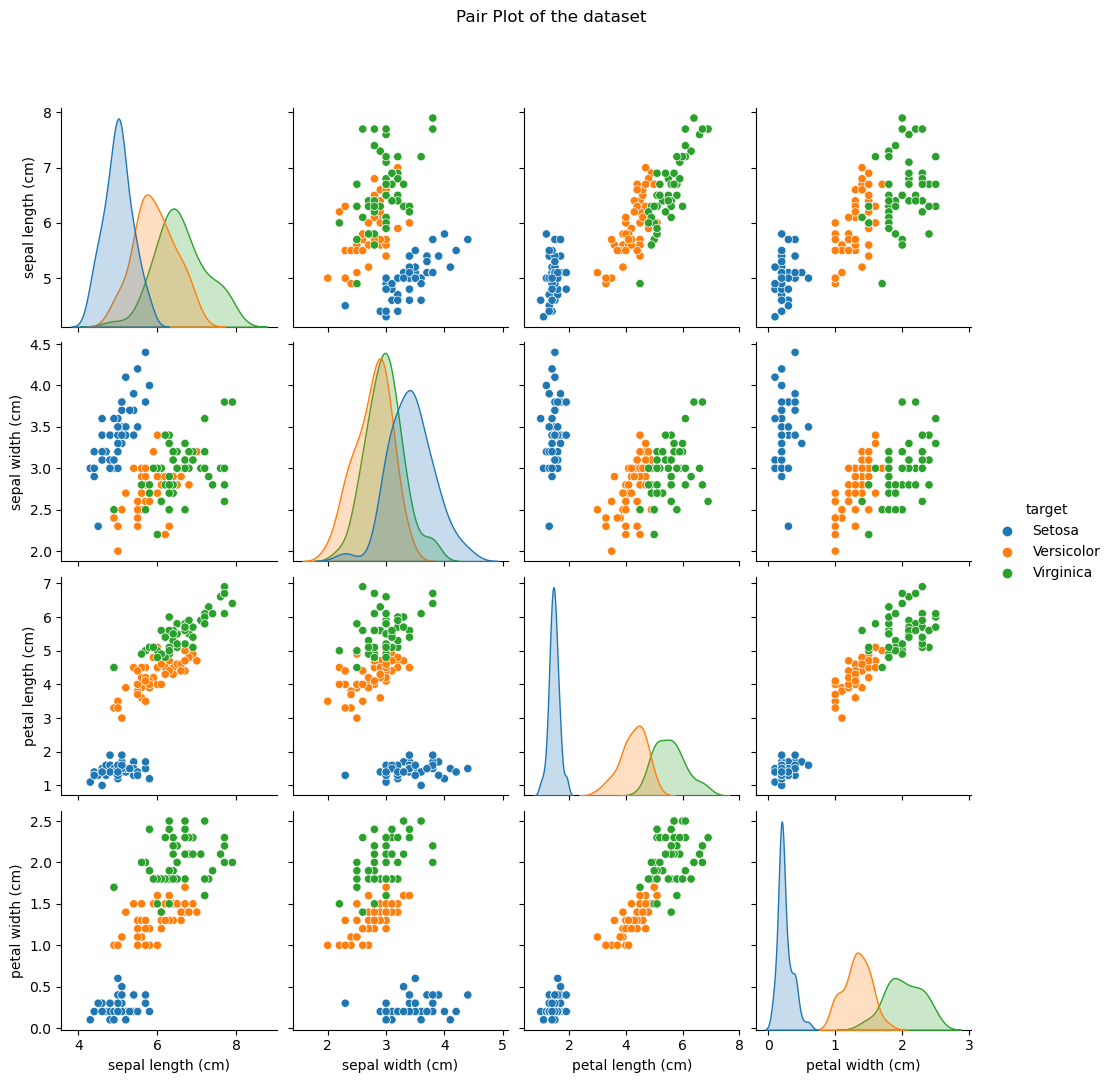

In [31]:
# View the relationships between variables; color code by species type
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset', y=1.08)
plt.show()

##### i. Analysis of plot 
- Data is not normalised and features are not scaled by referring to the following:
    - Scale of Axes are dissimilar across different features
    - Distribution Shapes of histograms on the diagonal of the pair plot are varied
    - Presence of outliers

##### ii. With normalisation, we achieve the following:
- Better Visualisation of Relationships:
    - Relationships between features are made more apparent with consistent scales
    - Facilitates model convergence such that machine learning algorithms converge faster and perform better
    - Mitigate impact of outliers as features with large scales might dominate the visualisation and skew the interpretation.
    - Normalised data is more interpretable, making it easier to compare the importance of different features.

### 2.3.2 Dataset standardisation and Feature selection
##### The transformed features will centre around 0 and their standardard deviations are 1. 
- This is done using the z-score:  
$ z = \frac{x - \mu}{\sigma} $$ z = \frac{x - \mu}{\sigma} $

where $\mu$$\mu$ and $\sigma$$\sigma$ are the mean and standard deviation of $x$$x$, respectively.

In [32]:
# Split into X(features) and y(target), as ndarrays 
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].astype(int).values

# Features (first 2 rows)
print("X")
print(X[0:2, :], "\n")

# Target (first 2 rows)
print("y")
print(y[0:2])

X
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]] 

y
[0 0]


#### a. Feature scaling function 
I have implemented a scaler function here to standardise the data, mimicking the StandardScaler from sklearn.preprocessing 

In [33]:
class myScaler() :
    def fit(self, X) :
        # For each feature/column, compute the mean and standard deviation of the feature
        self.mu = X.mean(axis=0) 
        self.sigma = X.std(axis=0)

    def transform(self, X) :
        # compute the z-scores of the features
        return (X- self.mu) / self.sigma

In [34]:
# initialise our standard scaler
scaler = myScaler()

# compute mean and standard deviation
scaler.fit(X)
# compute z-score, i.e. scaled features to centre around 0 and have standard deviation of 1
Xs = scaler.transform(X)

#### b. Study scaled features to confirm their accuracy 
Checking data to confirm that the standardised data reflects that mean values are close to 0 and standard deviation values are close to 1. 

In [35]:
pd.DataFrame(data=Xs, columns=['sepal length', 'sepal width', 'petal length', 'petal width']).describe()

,sepal length,sepal width,petal length,petal width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


As seen above, mean ≈ 0, std ≈ 1, therefore features are standardised 
#### c. Visualise the data after standardisation
- Pair plots are reproduced with the scaled data 

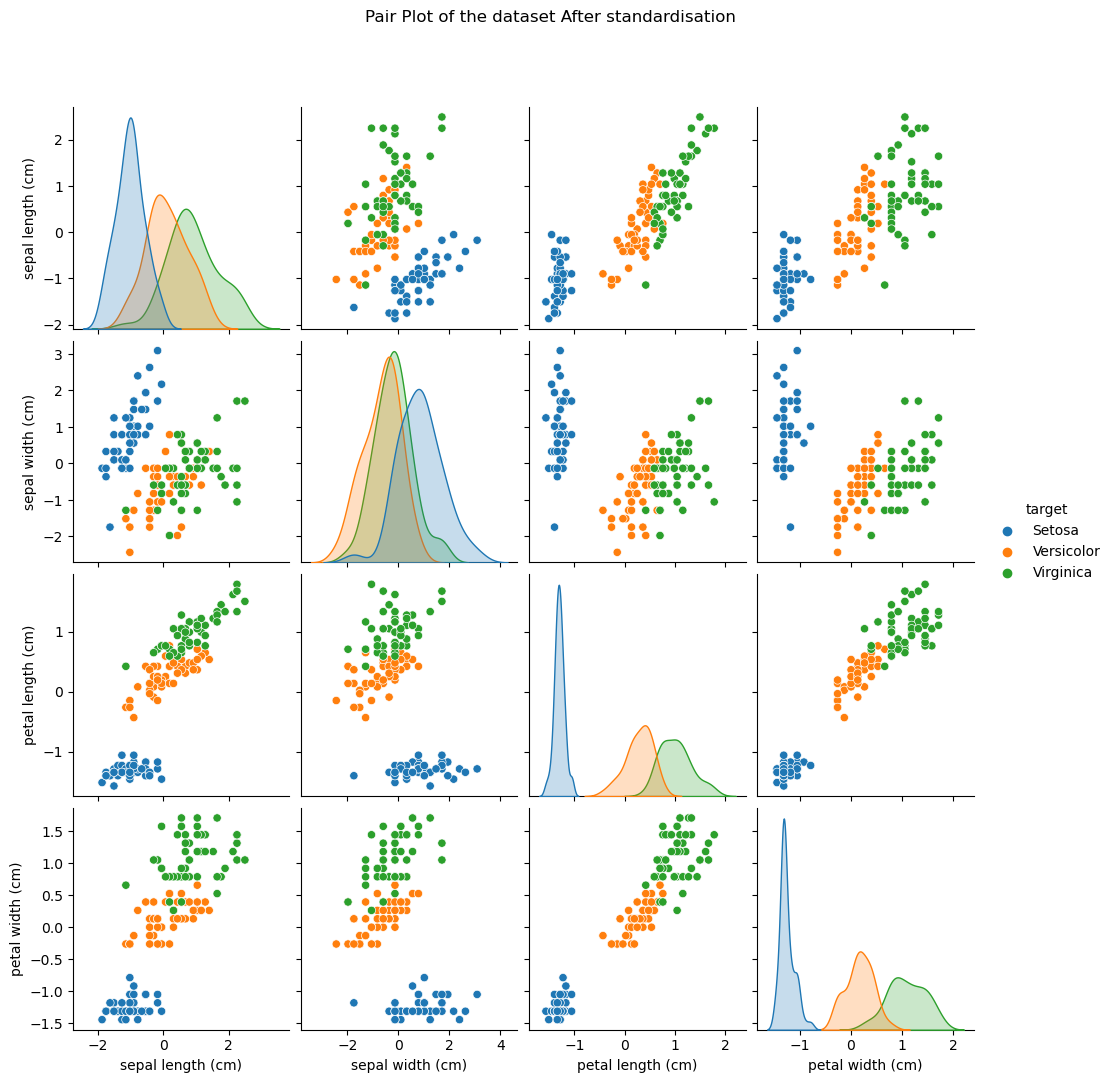

In [36]:
## After normalisation
iris_df_2= pd.DataFrame(data= np.c_[Xs, y],
                        columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After standardisation', y=1.08)
plt.show()

##### i. Analysis of plot
- Data is normalised, as indicated by the scale of axes and  histograms that represent a normal distribution 
- Separation of classes is also scaled as per distribution and visibly clearer to interpret
#### d. Boxplots (outliers)

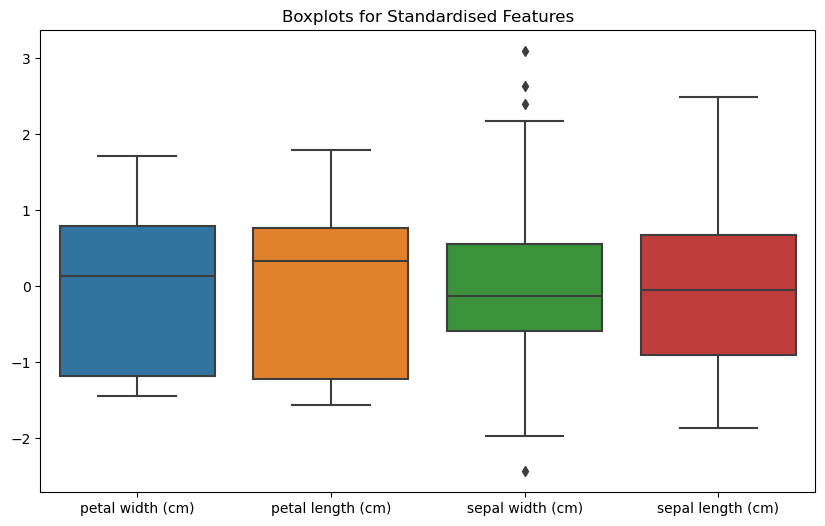

In [37]:
# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))

# Create a boxplot for 'petal width', 'petal length', and 'sepal width'
sns.boxplot(data=iris_df_2[['petal width (cm)', 'petal length (cm)', 'sepal width (cm)', 'sepal length (cm)']])
plt.title('Boxplots for Standardised Features')
plt.show()


##### i. Analysis of plot 
- Box-plots show generally acceptable distributions, with only the feature “sepal width” having 3 outliers. 
- The outliers are not too skewed from the data, and considering the small size od the dataset, it may be more prudent to retain these outliers for a more representative classification model
## 2.3 Establishing Baseline (Naive Model)

In [38]:
from collections import Counter
# instances of each class 
Counter(iris_df_2['target'])

Counter({0.0: 50, 1.0: 50, 2.0: 50})

In [39]:
# The fraction of the majority class will be our baseline accuracy
base_acc = 50/(50+50+50) 
base_acc

0.3333333333333333

# 3. Background (covered in Report)

# 4. Methodology 
## 4.1 Data Pre-Processing 
### 4.1.1 Train test split
The train-test split is a common practice in machine learning to evaluate the performance of a model. It involves splitting a dataset into two subsets: one for training the model and the other for testing its performance. The primary goal is to assess how well the model generalises to new, unseen data, as the purpose of machine learning models is to predict data, rather than learn the supplied data as accurately as possible. 

- Training Set: The larger portion of the dataset is used for training the machine learning model.
    - This set is used to teach the model patterns and relationships in the data.
- Testing Set:
    - The smaller portion of the dataset is reserved for testing the model's performance. This set is used to evaluate how well the model can make predictions on new, unseen data.

The train-test split is crucial for:
- Performance Evaluation 
    - It provides an unbiased evaluation of a model fit on the training dataset by testing its performance on a separate dataset.
- Overfitting Detection:
    - It helps identify if a model is overfitting the training data by performing well on the training set but poorly on the test set. Overfitting means that the model is too accommodating to the bias in the dataset.

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # features
                                                    y, # targets
                                                    train_size = 0.8, # 80% training data, 20% test data
                                                    shuffle = True, #shuffle the data to avoid bias
                                                    random_state = 204) 

In [41]:
print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


### 4.1.2 Feature scaling 
Feature scaling is a crucial preprocessing step in many machine learning algorithms. It involves transforming the values of different features (variables) in the dataset to a standardised range. The main reasons for performing feature scaling include:

- Normalisation of Data:
    - Features may have different scales, and some machine learning algorithms are sensitive to the scale of the input features. Scaling ensures that all features have a similar scale, preventing certain features from dominating others.
- Distance-Based Algorithms:
    - Algorithms that rely on distances between data points, such as k-Nearest Neighbours (kNN), can be influenced by the scale of the features. Scaling ensures that the influence of each feature is more balanced.

- For this project, I have employed:
    - Standardisation (Z-score normalisation): Scales features to have a mean of 0 and a standard deviation of 1.
    - In Python, the StandardScaler from the sklearn.preprocessing module is commonly used for feature scaling. It standardises features by removing the mean and scaling to unit variance.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

Xs_train = scaler.transform(X_train) # used to train the ML models
Xs_test = scaler.transform(X_test) # used to test the ML models 

In [43]:
print('X train before Scaling')
print(X_train[0:5])
print('\nX train after Scaling')
print(Xs_train[0:5])

X train before Scaling
[[5.8 2.8 5.1 2.4]
 [5.8 2.7 3.9 1.2]
 [6.5 3.  5.5 1.8]
 [4.6 3.4 1.4 0.3]
 [5.4 3.9 1.7 0.4]]

X train after Scaling
[[-0.06451088 -0.54641094  0.76176726  1.58463618]
 [-0.06451088 -0.7848448   0.0679375  -0.01555744]
 [ 0.78219448 -0.06954321  0.99304384  0.78453937]
 [-1.51600579  0.88419225 -1.37754117 -1.21570265]
 [-0.54834252  2.07636157 -1.20408373 -1.08235318]]


## 4.2 kNN function (from scratch)

In [44]:
def pairwise_distance(x, y, distance):
    """
    Compute pairwise distance between two vectors x and y based on the specified distance metric.

    Parameters:
    - x, y: Input vectors.
    - distance: String specifying the distance metric ("euclidean" or "manhattan").

    Returns:
    - Pairwise distance between x and y.
    """
    if distance == "euclidean":
        return np.sum((x - y)**2)**0.5
    elif distance == "manhattan":
        return np.sum(np.abs(x - y))

class MyKNN():
    def __init__(self, neighbors=3, distance="euclidean"):
        """
        Initialize the kNN classifier.

        Parameters:
        - neighbors: Number of neighbors to consider during classification.
        - distance: String specifying the distance metric ("euclidean" or "manhattan").
        """
        self.neighbors = neighbors
        self.distance = distance

    def fit(self, X, y):
        """
        Train the kNN classifier with the training data.

        Parameters:
        - X: Feature matrix of shape (n_samples, n_features).
        - y: Target values corresponding to each sample in X.
        """
        self.X = X
        self.y = y

    def predict(self, Q):
        """
        Predict the class labels for the input data.

        Parameters:
        - Q: Feature matrix of shape (n_queries, n_features) for which predictions are to be made.

        Returns:
        - y_pred: Predicted class labels for each query in Q.
        """
        y_pred = np.zeros(Q.shape[0])

        # Loop over each query point in Q
        for j in range(Q.shape[0]):
            distances = np.zeros(self.X.shape[0])

            # Compute pairwise distances between the query point and all training points
            for i in range(self.X.shape[0]):
                distances[i] = pairwise_distance(self.X[i, :], Q[j, :], self.distance)

            # Find indices of the sorted distances
            indices = np.argsort(distances)

            # Get the classes of the k-nearest neighbors
            nearest_classes = self.y[indices[:self.neighbors]]

            # Count the occurrences of each class
            counter = Counter(nearest_classes)

            # Assign the most common class as the prediction
            y_pred[j] = counter.most_common(1)[0][0]

        return y_pred

## 4.3 Cross-Validation and Hyperparameter tuning
### 4.3.1 kNN Parameters 
#### a. Distance Metrics
Used as a measure of closeness to find nearest data points
##### Commonly used:
- Euclidean Distance (or 𝐿2 Norm): $D(x,y) = \sqrt{\sum_{i=1}^{N} (x_i - y_i)^2}$
    - Represents the straight-line distance between two points in Euclidean space. It is sensitive to the magnitude of differences in individual dimensions.
    - Suitable when the features have similar scales and when the spatial relationships between points are important.
- Manhattan Distance (or 𝐿1 Norm): $D(x,y) = \sum_{i=1}^{N} |x_i - y_i|$
    - Represents the sum of the absolute differences between corresponding coordinates. It is less sensitive to outliers than Euclidean distance.
    - Suitable when the dataset has outliers or when differences along individual dimensions are more important than overall magnitude.
- Cosine Similarity:  $D(x,y) = 1 - \frac{\sum_{1=1}^{N}x_i \cdot y_i}{||x||\cdot||y||}$ 
,where 𝑥 and 𝑦 are 𝑁-dimensional vectors.
    - Measures the cosine of the angle between two vectors. It is commonly used for text data and is robust to differences in magnitudes.
    - Suitable for high-dimensional data, sparse data (like text data), or situations where the magnitude of the vectors is not important.

##### i. For the purposes of this investigation, I will be using Euclidean and Manhattan distance as they are most suitable in this context

#### b. Neighbours 
In k-Nearest Neighbours (kNN), the "k" value represents the number of nearest neighbours that are considered when making a prediction for a new data point (as mentioned in 3.1.1). It is a hyperparameter needs to be determined before training the kNN algorithm. 

The choice of the "k" value can have a significant impact on the performance of the kNN model.
- Smaller k Values:
    - Small value for k (e.g., k = 1), can result in a more flexible model that is sensitive to noise or outliers in the data. However, it may also lead to overfitting.
- Larger k Values:
    - Larger value for k (e.g., k = 10), can result in a smoother decision boundary and a more robust model that is less sensitive to individual data points. However, it may lead to underfitting, especially if the dataset has complex patterns.
- For this project, we will determine the optimal value of k for balance between bias and variance, using Hyperparameter Tuning through k-fold cross-validation and grid search
    - The range of k-values (1-20) is chosen based on general rule of thumb, since this parameter will be tuned later on.

### 4.3.2 Decision Tree Classifier Parameters (covered in report)
#### a. Maximum Depth of tree
- The maximum depth of the decision tree is the longest path between the root node and a leaf node. It represents the maximum number of levels in the tree.
- Controlling the maximum depth helps prevent the tree from becoming too deep and overly complex. A shallow tree may underfit the data, while a very deep tree may overfit the training data and perform poorly on new, unseen data.
- This parameter will also be tuned through cross-validation.

#### b. Minimum samples required to split a node 
- The min_samples_split parameter sets the minimum number of samples required to split an internal node into child nodes. If the number of samples at a node is less than this parameter, the node will not be split, and it becomes a leaf node.
- It controls the granularity of the splits in the decision tree. Higher values ensure that a node is split only if it contains a sufficient number of samples, preventing small, noisy splits.
- This parameter will also be tuned to balance the trade-off between tree complexity and generalisation.

### 4.3.3 Cross-Validation function
#### GridSearchCV (from scratch)

In [46]:
from sklearn.model_selection import KFold # for k-fold cross-validation 
from sklearn.metrics import accuracy_score
import itertools

def cross_validation(X, y, cv, model, params):
    """
    Perform cross-validation to find the best hyperparameters for a given model using accuracy as the metric.

    Parameters:
    - X: Feature matrix of shape (n_samples, n_features).
    - y: Target values corresponding to each sample in X.
    - cv: Number of folds for cross-validation.
    - model: Machine learning model with hyperparameters to be tuned.
    - params: Dictionary of hyperparameter values to be considered in the search space.

    Returns:
    - best_param: Dictionary containing the best hyperparameters.
    - best_score: Mean cross-validation accuracy score corresponding to the best hyperparameters.
    - cvs: Dictionary containing cross-validation accuracy scores for all hyperparameter combinations.
    """
    kf = KFold(n_splits=cv)
    keys, values = zip(*params.items())

    # Cross-validation accuracy scores
    cvs = {}

    # Loop over all hyperparameter combinations
    for param in [dict(zip(keys, v)) for v in itertools.product(*values)]:
        scores = []

        # Perform cross-validation
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            # Initialize the model with the current hyperparameters
            model.__init__(**param)

            # Train the model on the training data
            model.fit(X[train_index, :], y[train_index])

            # Make predictions on the test data
            y_pred = model.predict(X[test_index, :])

            # Evaluate the model based on accuracy
            score = accuracy_score(y[test_index], y_pred)

            scores.append(score)

        # Compute the mean cross-validation accuracy score for the current hyperparameter combination
        cvs[str(param)] = np.array(scores).mean()

    # Identify the hyperparameters with the highest mean cross-validation accuracy score
    best_param = max(cvs, key=cvs.get)
    best_score = cvs[best_param]

    return best_param, best_score, cvs

### 4.3.4 Implementation (for Hyperparameters)
#### a. kNN

In [63]:
cv = 5 # Number of folds for cross-validation (in this case, 5-fold cross-validation)

params = {"neighbors": list(range(1, 20)),
          "distance": ["euclidean", "manhattan"]}

# Perform cross-validation to find the best hyperparameters for the kNN model
best_param, best_score, cvs = cross_validation(Xs_train, y_train, cv, MyKNN(), params)

# Display the best hyperparameters and the corresponding mean cross-validation accuracy score
print("5-fold Cross-validation results")
print("Best Hyperparameters:", best_param)
print("Best Cross-Validation Accuracy Score:", best_score)

5-fold Cross-validation results
Best Hyperparameters: {'neighbors': 4, 'distance': 'euclidean'}
Best Cross-Validation Accuracy Score: 0.975


In [64]:
cv = 4 # Number of folds for cross-validation (in this case, 4-fold cross-validation)

params = {"neighbors": list(range(1, 20)),
          "distance": ["euclidean", "manhattan"]}

# Perform cross-validation to find the best hyperparameters for the kNN model
best_param, best_score, cvs = cross_validation(Xs_train, y_train, cv, MyKNN(), params)

# Display the best hyperparameters and the corresponding mean cross-validation accuracy score
print("4-fold Cross-validation results")
print("Best Hyperparameters:", best_param)
print("Best Cross-Validation Accuracy Score:", best_score)

4-fold Cross-validation results
Best Hyperparameters: {'neighbors': 4, 'distance': 'euclidean'}
Best Cross-Validation Accuracy Score: 0.9750000000000001


#### kNN Model - Highest Accuracy score: 0.9750000000000001
- **4-fold cross-validation**
- **neighbours = 6**
- **distance metric = euclidean**

In [65]:
cv = 3 # Number of folds for cross-validation (in this case, 3-fold cross-validation)

params = {"neighbors": list(range(1, 20)),
          "distance": ["euclidean", "manhattan"]}

# Perform cross-validation to find the best hyperparameters for the kNN model
best_param, best_score, cvs = cross_validation(Xs_train, y_train, cv, MyKNN(), params)

# Display the best hyperparameters and the corresponding mean cross-validation accuracy score
print("3-fold Cross-validation results")
print("Best Hyperparameters:", best_param)
print("Best Cross-Validation Accuracy Score:", best_score)

3-fold Cross-validation results
Best Hyperparameters: {'neighbors': 14, 'distance': 'euclidean'}
Best Cross-Validation Accuracy Score: 0.9583333333333334


#### b. Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

cv = 5
params = {"max_depth": list(range(1, 10)), # maximum depth of the tree
          "min_samples_split": [2, 4, 8, 16, 32]} # minimum samples required to split an internal node 

# Perform cross-validation to find the best hyperparameters for the Decision Tree model
# arbitrary random state for reproducability 
best_param, best_score, cvs = cross_validation(Xs_train, y_train, cv, DecisionTreeClassifier(random_state=42), params)

# Display the best hyperparameters and the corresponding mean cross-validation accuracy score
print("5-fold Cross-validation results")
print("Best Hyperparameters:", best_param)
print("Best Cross-Validation Accuracy Score:", best_score)

5-fold Cross-validation results
Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 2}
Best Cross-Validation Accuracy Score: 0.9416666666666668


In [67]:
from sklearn.tree import DecisionTreeClassifier

cv = 4
params = {"max_depth": list(range(1, 10)), # maximum depth of the tree
          "min_samples_split": [2, 4, 8, 16, 32]} # minimum samples required to split an internal node 

# Perform cross-validation to find the best hyperparameters for the Decision Tree model
# arbitrary random state for reproducability 
best_param, best_score, cvs = cross_validation(Xs_train, y_train, cv, DecisionTreeClassifier(random_state=42), params)

# Display the best hyperparameters and the corresponding mean cross-validation accuracy score
print("4-fold Cross-validation results")
print("Best Hyperparameters:", best_param)
print("Best Cross-Validation Accuracy Score:", best_score)

4-fold Cross-validation results
Best Hyperparameters: {'max_depth': 7, 'min_samples_split': 2}
Best Cross-Validation Accuracy Score: 0.9583333333333334


#### Decision Tree Classifier Model - Highest Accuracy score: 0.9583333333333334
- **4-fold cross-validation**
- **max_depth = 6**
- **min_samples_split = 2**

In [68]:
from sklearn.tree import DecisionTreeClassifier

cv = 3
params = {"max_depth": list(range(1, 10)), # maximum depth of the tree
          "min_samples_split": [2, 4, 8, 16, 32]} # minimum samples required to split an internal node 

# Perform cross-validation to find the best hyperparameters for the Decision Tree model
# arbitrary random state for reproducability 
best_param, best_score, cvs = cross_validation(Xs_train, y_train, cv, DecisionTreeClassifier(random_state=42), params)


# Display the best hyperparameters and the corresponding mean cross-validation accuracy score
print("3-fold Cross-validation results ")
print("Best Hyperparameters:", best_param)
print("Best Cross-Validation Accuracy Score:", best_score)

3-fold Cross-validation results 
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2}
Best Cross-Validation Accuracy Score: 0.9500000000000001


# 5. Results
## 5.1 Evaluation on test data
### 5.1.1 Retrain kNN Classifier and Evaluate on test data 

In [49]:
from sklearn.metrics import confusion_matrix

# Initialize kNN model with specific hyperparameters (produced above)
knn = MyKNN(neighbors=4, distance="euclidean")

# Train (fit) the kNN model on the training data
knn.fit(Xs_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(Xs_test)

# Evaluate the kNN model on the test data using accuracy
print("Accuracy (Test):", accuracy_score(y_test, y_pred))

# Display the confusion matrix for further analysis
print("Confusion Matrix (Test):")
confusion_matrix(y_test, y_pred)

Accuracy (Test): 0.9333333333333333
Confusion Matrix (Test):


array([[12,  0,  0],
       [ 0,  7,  0],
       [ 0,  2,  9]])

### 5.1.2 Retrain Decision Tree Classifier and Evaluate on test data 

In [55]:
# Initialize Decision Tree model with specific hyperparameters
dt = DecisionTreeClassifier(max_depth=6, min_samples_split=2, random_state=42)

# Train (fit) the Decision Tree model on the training data
dt.fit(Xs_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(Xs_test)

# Evaluate the Decision Tree model on the test data using accuracy
print("Accuracy (Test):", accuracy_score(y_test, y_pred))

# Display the confusion matrix for further analysis
print("Confusion Matrix (Test):")
confusion_matrix(y_test, y_pred)

Accuracy (Test): 0.9333333333333333
Confusion Matrix (Test):


array([[12,  0,  0],
       [ 0,  7,  0],
       [ 0,  2,  9]])

## 5.2 Results Summary
- Both kNN and Decision Tree models significantly outperform the baseline accuracy.
- The kNN and Decision Tree models exhibit similar and high test accuracies, suggesting robust performance.
- The variance in cross-validation accuracy for kNN and Decision Tree indicates the stability of the model across different folds and k values, with a 4-fold cross validation reflecting best predictive ability considering bias and variance. 
- Similarity in confusion matrix also indicates similar interpretability of target across the two models

# 6. Evaluation
- Model Performance:
    - Both models have performed very well on this data, in achieving their target of accuracy in classifying the flower species with an accuracy of above 90%
    - However, based on my aim of finding the best ML model among the two, these results are not very helpful as they have both presented exactly the same accuracy scores
    - It could be deduced that both models work as effectively in classification for this dataset
- Potential Improvements:
    - Additional algorithms could be explored, such as Random Forest, Support Vector Machines.
    - Feature Engineering could improve model performance by determining the features that contribute more significantly to the classification to achieve higher accuracy scores.
    - This is verified by a study I found online, whereby a higher accuracy score was achieved with kNN for the same dataset through feature engineering (refer to feature selection in references)
- Consideration of Dataset Size:
    - Given the small dataset size (150 instances), this model may be overly complex, fitting well only for this dataset, and not generalise well to new data. High accuracy scores can be expected for a dataset of this size. 
- Domain knowledge: 
    - Seeking feedback from domain experts or stakeholders can provide valuable guidance on improving model performance or addressing specific challenges in the dataset.
      
# 7. Conclusion
The dataset is overly simple and does not consist of sufficient variance to effectively determine what ML model would fit the data better, as all the techniques employed in this project are carried out in a very minute scale. Furthermore, the nature of the dataset, being exactly balanced and well separated to begin with, also limit the potential for further analysis since the best metric for comparison is possibly only accuracy. However, on the basis of this data, both classification models kNN and Decision Trees are equally effective in achieving their goals. 

# 8. References 
- 2.1.2 <b>np.c_</b> : 
https://numpy.org/doc/stable/reference/generated/numpy.c_.html
- 2.3.1.a, 2.3.2.c <b>pair plots</b>: https://deepnote.com/@ndungu/Implementing-KNN-Algorithm-on-the-Iris-Dataset-e7c16493-500c-4248-be54-9389de603f16
- Feature selection: https://medium.com/nerd-for-tech/data-engineering-a-feature-selection-example-with-the-iris-dataset-11f0554e4b00 